# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Оглавление: 
1. [1. Загрузка и подготовка данных](#step1)  
2. [2. Обучение и проверка модели](#step2)  
3. [3. Подготовка к расчёту прибыли](#step3)
4. [4. Расчёт прибыли и рисков](#step4)
6. [6. Итоговый вывод](#step5)

## 1. Загрузка и подготовка данных <a id="step1"></a> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
data0 = pd.read_csv("https://code.s3.yandex.net/datasets/geo_data_0.csv")
data1 = pd.read_csv("https://code.s3.yandex.net/datasets/geo_data_1.csv")
data2 = pd.read_csv("https://code.s3.yandex.net/datasets/geo_data_2.csv")

In [3]:
def preview(data):
    print("Данные по таблице")
    print("Размер таблицы:", data.shape)
    print("Дубликатов:", data.duplicated().sum())
    display(data.head())
    print(data.info())
    print(data.isnull().sum())
    print(data.describe())
    print()



   

In [4]:
preview(data0)
preview(data1)
preview(data2)

Данные по таблице
Размер таблицы: (100000, 5)
Дубликатов: 0


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790    

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063       5.019721    

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801      16.739402    

In [5]:
#проверим как распределены данные, т.к. линейная регрессия очень чувствительна к выбросам
def grafic(name,data):
    data = data.drop(['id'], axis = 1)
    data_columns = data.columns.tolist()
    print()
    print(f"Данные по региону {name}")
    for i in data_columns:
        minimum = data[i].min()
        maximum = data[i].max()
        data.hist(i, bins = 10000, range = (minimum, maximum))        
        plt.ylabel('частота')
        plt.xlabel("значение признака")
        plt.show()
        sns.boxplot(data=data[i])
        plt.show()



Данные по региону 0


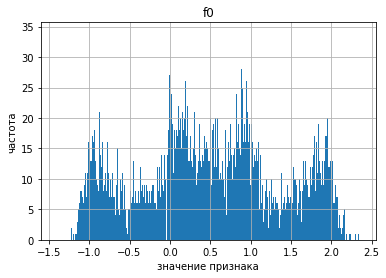

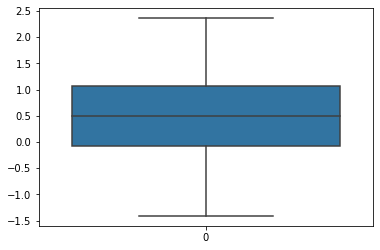

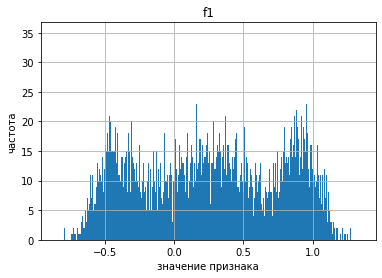

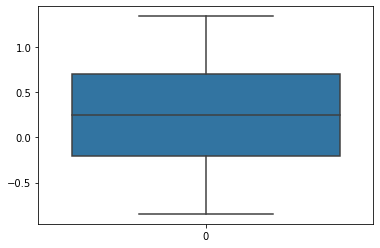

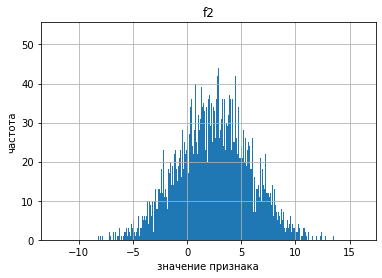

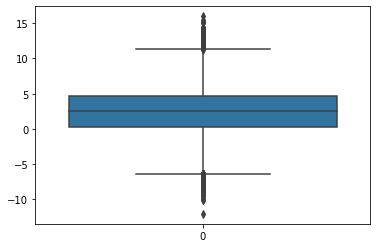

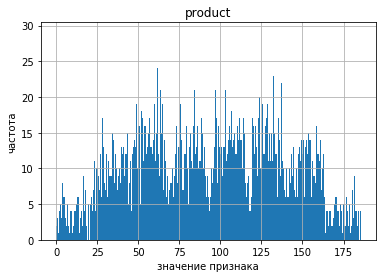

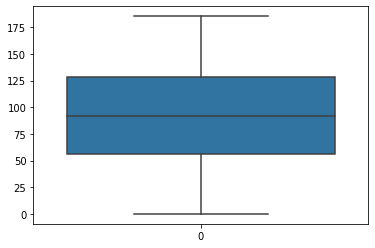


Данные по региону 1


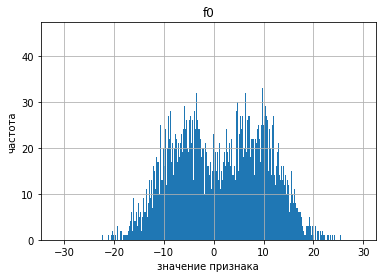

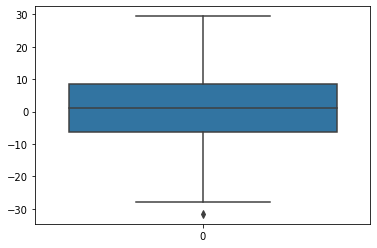

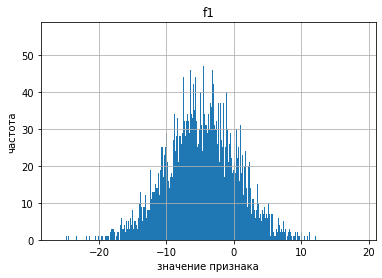

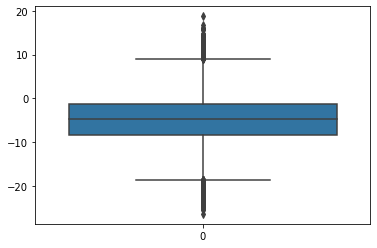

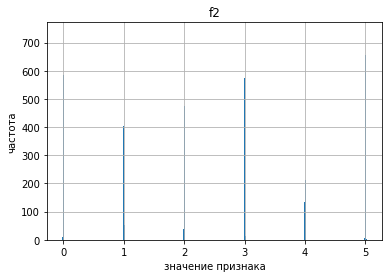

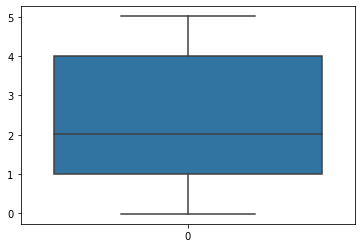

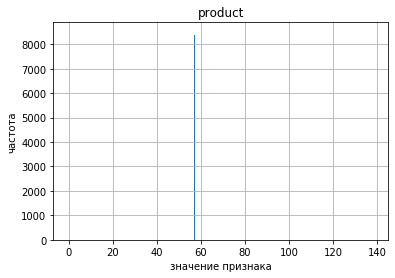

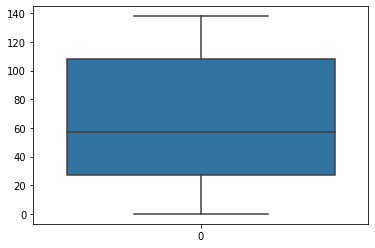


Данные по региону 2


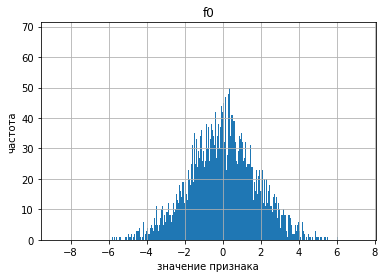

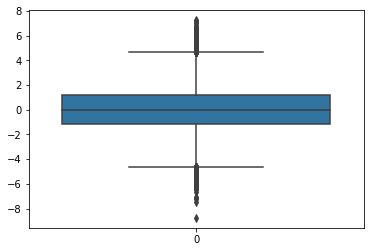

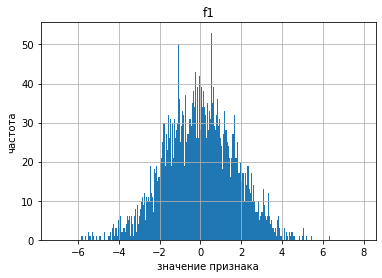

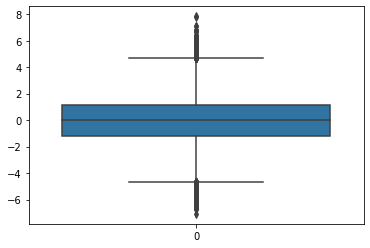

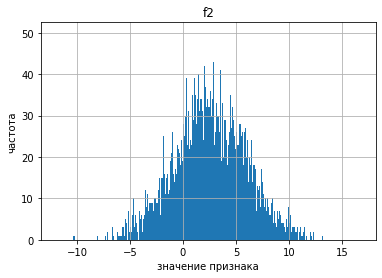

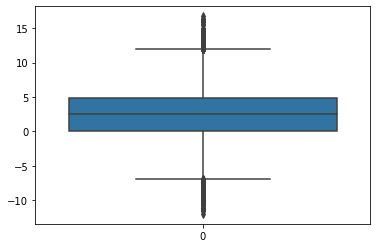

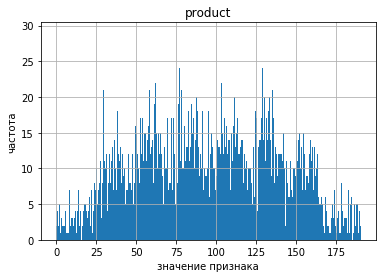

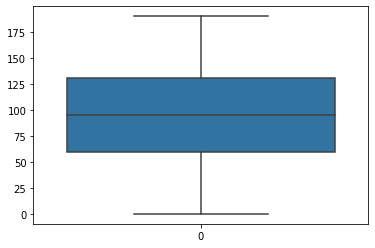

In [6]:
grafic(0, data0)
grafic(1, data1)
grafic(2, data2)

In [7]:
#по графикам с нормальным распределением есть выбросы - избавимся от них с помощью 3 сигм
#регион_0 - f2, регион_1 - f0, f1, регион_2 - f0, f1, f2
list_0 = ['f2']
list_1 = ['f0', 'f1']
list_2 = ['f0', 'f1', 'f2']

def sigma(data, f_list):
    for i in f_list:
        m = data[i].mean() 
        st_deviation = np.std(data[i])
        sigma_3 = 3*st_deviation
        data = data[(data[i]<=(m+sigma_3)) & (data[i]>=(m-sigma_3))]      
    print("Размер получившегося датафрейма:", data.shape)
    return data

In [8]:
data0 = sigma(data0, list_0)
data1 = sigma(data1, list_1)
data2 = sigma(data2, list_2)

Размер получившегося датафрейма: (99822, 5)
Размер получившегося датафрейма: (99731, 5)
Размер получившегося датафрейма: (99253, 5)


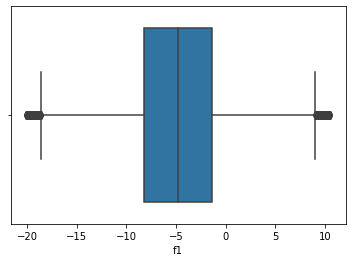

In [9]:
### код ревьюера
sns.boxplot(data1['f1'])

In [10]:
def features_target_std(data):
    features = data.drop(['product', 'id'], axis = 1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.25, random_state = 123)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train_scaler = scaler.transform(features_train)
    features_valid_scaler = scaler.transform(features_valid)
    return features_train_scaler, features_valid_scaler, target_train, target_valid

#пропустить

def features_target_std(data):
    features = data.drop(['product', 'id'], axis = 1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.25, random_state = 123)
    target_valid_500 = target_valid.sample(500, random_state=123)
    target_valid_500 = target_valid_500.sort_values(ascending = False)
    target_valid_200 = target_valid_500[:200]
    ind_list = target_valid_200.index.tolist()
    features_valid_200 = features_valid.loc[ind_list]
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train_scaler = scaler.transform(features_train)
    features_valid_scaler = scaler.transform(features_valid_200)
    return features_train_scaler, features_valid_scaler, target_train, target_valid_200

In [11]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = features_target_std(data0)
features_train_1, features_valid_1, target_train_1, target_valid_1 = features_target_std(data1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = features_target_std(data2)

### Вывод:
Я загрузила 3 таблицы с данными о пробах нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов, соответственно датасет состоит из 10000 строк и 5 колонок. Дублей нет, типы колонок корректны. Я удалила колонку 'id', т.к. это уникальный идентификатор скважины и эти данные не требуются для обучения моделей; построила графики по признакам скажин. Не у всех признаков было нормальное рапределение. часть признаков имело волнообразное рапределение, часть - определенные значения. Там где распределение признака оказалось нормальным, но были выбросы, я удалила выбросы по правилу трех сигм. Это было сделано, т.к. модель линейной регрессии, которую мы будем использовать для обучения чувствительна к выбросам. Признаки с ненормальным рапределением я не обработала от выбросов, т.к. учитывая распределение выбросы могут быть критичны. Соотвественно у нас получились следующие размеры датафреймов: 0-регион (99822, 5), 1-регион (99731, 5), 2-регион (99253, 5). Также я стандартизировала численные данные.
Исходные данные я разбила на 2 группы по правилу 75:25. Обучающая выборка - 75%, валидационная выборка - 25%. Все данные в выборках я разделина на признаки (features) и целевой признак 'product' (target).

## 2. Обучение и проверка модели <a id="step2"></a> 

In [12]:
def model_check(name, features_train, features_valid, target_train, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)
    mse = mean_squared_error(target_valid, predicted)
    
    print(f"Данные по региону {name}.")
    print("Средний запас предсказанного сырья:", predicted.mean())
    print("Средний запас реального сырья:", target_valid.mean())
    print("RMSE модели:", mse ** 0.5)
    print("R2 (коэффициент детерминации) модели:", r2_score(target_valid, predicted))
    print()
    
    return predicted


In [13]:
predicted_0 = model_check(0, features_train_0, features_valid_0, target_train_0, target_valid_0)
predicted_1 = model_check(1, features_train_1, features_valid_1, target_train_1, target_valid_1)
predicted_2 = model_check(2, features_train_2, features_valid_2, target_train_2, target_valid_2)


Данные по региону 0.
Средний запас предсказанного сырья: 92.34398029962645
Средний запас реального сырья: 92.27730576522856
RMSE модели: 37.493481747973256
R2 (коэффициент детерминации) модели: 0.27808308150497074

Данные по региону 1.
Средний запас предсказанного сырья: 68.92579908992415
Средний запас реального сырья: 68.91073604245626
RMSE модели: 0.8890710151830457
R2 (коэффициент детерминации) модели: 0.9996276770573417

Данные по региону 2.
Средний запас предсказанного сырья: 94.79408004269756
Средний запас реального сырья: 95.10741654384168
RMSE модели: 40.05009627687286
R2 (коэффициент детерминации) модели: 0.19599234350763928



               f0        f1        f2   product
f0       1.000000  0.180223 -0.001729 -0.030445
f1       0.180223  1.000000 -0.002613 -0.010086
f2      -0.001729 -0.002613  1.000000  0.999397
product -0.030445 -0.010086  0.999397  1.000000


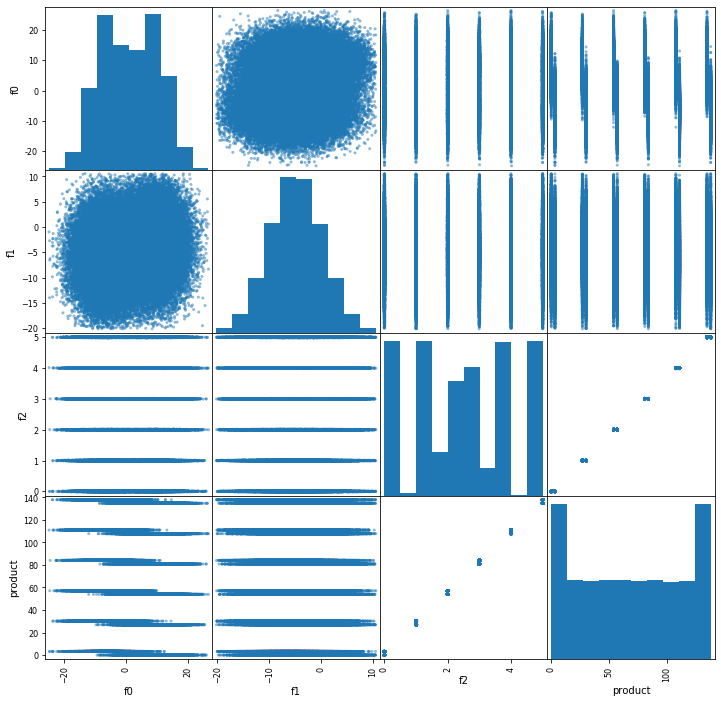

In [14]:
#модель в регионе 1 работает практически идеально. проверим корреляцию
print(data1.corr())
pd.plotting.scatter_matrix(data1, figsize = (12,12))
plt.show()

In [15]:
print(data1[['f2', 'product']].head())

         f2     product
0 -0.005876    3.179103
1  0.999183   26.953261
2  5.001160  134.766305
3  4.999415  137.945408
4  5.004363  134.766305


### Вывод:
Я обучила модель линейной регрессии (LinearRegression) и получила следующие данные и показатели по региону:
Данные по региону 0:
Средний запас предсказанного сырья: 92.34
Средний запас реального сырья: 92.27
RMSE модели: 37.49
R2 (коэффициент детерминации) модели: 0.27

Данные по региону 1:
Средний запас предсказанного сырья: 68.92
Средний запас реального сырья: 68.91
RMSE модели: 0.88
R2 (коэффициент детерминации) модели: 0.99

Данные по региону 2:
Средний запас предсказанного сырья: 94.79
Средний запас реального сырья: 95.1
RMSE модели: 40.05
R2 (коэффициент детерминации) модели: 0.19

Модель хорошо обучилась, средний запас предсказанного сырья в скважинах и средний запас реального сырья почти совпадают во всех трех регионах. Однако лучшею метрику R2 показал только один регион  - первый, r2 = 0.99. Стоит отметить, что это связано с высоким коэффициентом корреляции признака "f2" и целевого признака "product": 0.99. В 0 и 2 регионе этот показатель меньше: 0,27 и 0,19 соответственно. Метрика RMSE коррелирует с метрикой R2: наименьшая среднеквадратичная ошибка у модели по данным 1 региона: 0,88; в 0 регионе RMSE = 37.49; во 2 регионе RMSE = 40.05

## 3. Подготовка к расчёту прибыли <a id="step3"></a> 

In [16]:
BUDGET = 10000000000
INCOME_1000_BARRLE = 450000
needed_volume = BUDGET/INCOME_1000_BARRLE
AMOUNT_500 = 500
AMOUNT_200 = 200

print("Достаточный объём сырья (в тысячах баррелей) для безубыточной разработки скважин:", needed_volume)
print("Достаточный объём сырья (в тысячах баррелей) для безубыточной разработки одной скважины:", (BUDGET/AMOUNT_200)/INCOME_1000_BARRLE)
print()
def mean_volume(name, data):
    print(f"Средний запас сырья (в тысячах баррелей) в регионе {name}:", data['product'].mean())
    print()
mean_volume(0, data0)
mean_volume(1, data1)
mean_volume(2, data2)

Достаточный объём сырья (в тысячах баррелей) для безубыточной разработки скважин: 22222.222222222223
Достаточный объём сырья (в тысячах баррелей) для безубыточной разработки одной скважины: 111.11111111111111

Средний запас сырья (в тысячах баррелей) в регионе 0: 92.49302077015817

Средний запас сырья (в тысячах баррелей) в регионе 1: 68.816344134401

Средний запас сырья (в тысячах баррелей) в регионе 2: 94.90949473843857



### Вывод:
Бюджет на разработку скважин в регионе — 10 млрд рублей. При один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей. Достаточный объём сырья (в тысячах баррелей) для безубыточной разработки скважин: 22222.22. Достаточный объём сырья (в тысячах баррелей) для безубыточной разработки одной скважины: 111.11
Средний запас сырья (в тысячах баррелей) в скважине в регионе 0: 92.49.
Средний запас сырья (в тысячах баррелей) в скважине в регионе 1: 68.79
Средний запас сырья (в тысячах баррелей) в скважине в регионе 2: 94.90

## 4. Расчёт прибыли и рисков <a id="step4"></a> 

In [17]:
def product_200_volume(name, predicted, target_valid):
    target_valid = target_valid.reset_index()
    predicted = pd.DataFrame(predicted, columns = ['prod'])
    predicted = predicted.sort_values(by = 'prod', ascending = False)
    list_predicted = predicted.head(AMOUNT_200).index.tolist()

    product_200_vol = 0
    for i in list_predicted:
        product_200_vol += target_valid.loc[i, 'product']
    print(f"Регион {name}:")
    print("Объем целевого значение объема сырья из топ-200 скважин по предсказанным объемам:", product_200_vol)
    print("Прибыль для полученного объёма сырья:", (product_200_vol*INCOME_1000_BARRLE)-BUDGET)
    print("Прибыль для полученного объёма сырья в млд:", ((product_200_vol*INCOME_1000_BARRLE)-BUDGET)/1000000000)


In [18]:
product_200_volume(0, predicted_0, target_valid_0)
product_200_volume(1, predicted_1, target_valid_1)
product_200_volume(2, predicted_2, target_valid_2)

Регион 0:
Объем целевого значение объема сырья из топ-200 скважин по предсказанным объемам: 29639.707630051467
Прибыль для полученного объёма сырья: 3337868433.523161
Прибыль для полученного объёма сырья в млд: 3.3378684335231608
Регион 1:
Объем целевого значение объема сырья из топ-200 скважин по предсказанным объемам: 27589.081548181224
Прибыль для полученного объёма сырья: 2415086696.681551
Прибыль для полученного объёма сырья в млд: 2.415086696681551
Регион 2:
Объем целевого значение объема сырья из топ-200 скважин по предсказанным объемам: 27184.610813136846
Прибыль для полученного объёма сырья: 2233074865.911581
Прибыль для полученного объёма сырья в млд: 2.233074865911581


In [19]:
def product_200_volume_2(name, predicted, target_valid):
    state = np.random.RandomState(123456)
    values = []
    target_valid = target_valid.reset_index()
    predicted = pd.DataFrame(predicted, columns = ['prod'])
    product_200_vol = 0
    for i in range(1000):
        all_income = 0
        predicted_500 = predicted.sample(n=AMOUNT_500, replace=True, random_state=state)
        predicted_500 = predicted_500.sort_values(by = 'prod', ascending = False)
        list_predicted = predicted_500.index.tolist()
        list_predicted = list_predicted[0:AMOUNT_200:]
        product_200_vol = 0
        for j in list_predicted:
            product_200_vol += (target_valid.loc[j, 'product'])
        all_income = product_200_vol*INCOME_1000_BARRLE
        values.append(all_income)
    values = pd.DataFrame(values, columns = ['prod'])
    print(f"Средний доход по {name} региону:", values['prod'].mean())
    print(f"Средний доход по {name} региону в млрд:", (values['prod'].mean())/1000000000)
    
    lower =values['prod'].quantile(0.025)
    upper = values['prod'].quantile(0.975)
    print("Нижний порог 95%-ого доверительного интервала:", lower)
    print("Верхний порог 95%-ого доверительного интервала:", upper)
    print("Нижний порог 95%-ого доверительного интервала в млрд:", lower/1000000000)
    print("Верхний порог 95%-ого доверительного интервала в млрд:", upper/1000000000)
    risks = 100*(len(values.query("prod < @BUDGET"))/len(values))
    print(f"Риск убытков равен {risks}%.")
    values.plot(kind = 'hist', y = 'prod', bins = 200)
    plt.show()

Средний доход по 0 региону: 10399924107.090643
Средний доход по 0 региону в млрд: 10.399924107090643
Нижний порог 95%-ого доверительного интервала: 9858488085.31162
Верхний порог 95%-ого доверительного интервала: 10891440901.673445
Нижний порог 95%-ого доверительного интервала в млрд: 9.85848808531162
Верхний порог 95%-ого доверительного интервала в млрд: 10.891440901673445
Риск убытков равен 7.199999999999999%.


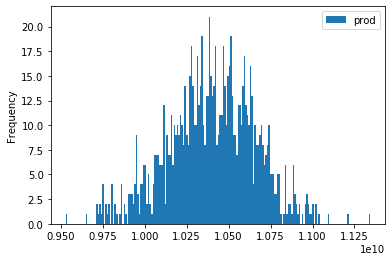

Средний доход по 1 региону: 10484882565.630548
Средний доход по 1 региону в млрд: 10.48488256563055
Нижний порог 95%-ого доверительного интервала: 10060386058.137232
Верхний порог 95%-ого доверительного интервала: 10880820517.331831
Нижний порог 95%-ого доверительного интервала в млрд: 10.060386058137231
Верхний порог 95%-ого доверительного интервала в млрд: 10.88082051733183
Риск убытков равен 1.0999999999999999%.


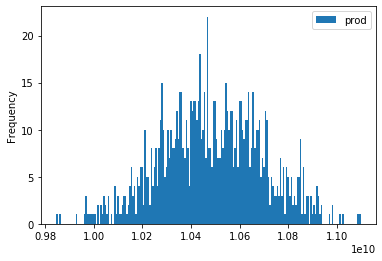

Средний доход по 2 региону: 10350434330.131695
Средний доход по 2 региону в млрд: 10.350434330131694
Нижний порог 95%-ого доверительного интервала: 9801501796.20083
Верхний порог 95%-ого доверительного интервала: 10843914303.720156
Нижний порог 95%-ого доверительного интервала в млрд: 9.80150179620083
Верхний порог 95%-ого доверительного интервала в млрд: 10.843914303720156
Риск убытков равен 9.8%.


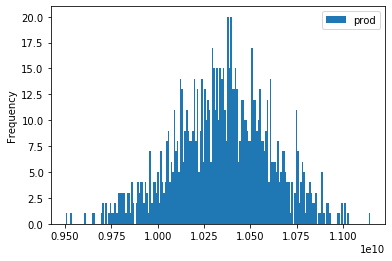

In [20]:
product_200_volume_2(0, predicted_0, target_valid_0)
product_200_volume_2(1, predicted_1, target_valid_1)
product_200_volume_2(2, predicted_2, target_valid_2)

### Вывод:
Я расчитала прибыль реального объёма сырья топ-200 скважин по предсказанным объемам.
Регион 0: объем целевого значение объема сырья из топ-200 скважин по предсказанным объемам: 29639.7. Прибыль для полученного объёма сырья в млд: 3.33
Регион 1: объем целевого значение объема сырья из топ-200 скважин по предсказанным объемам: 27589. Прибыль для полученного объёма сырья в млд: 2.41
Регион 2: объем целевого значение объема сырья из топ-200 скважин по предсказанным объемам: 27184.61. Прибыль для полученного объёма сырья в млд: 2.23
По всем трем регионам прибыль на основе реально полученного объёма сырья больше бюджета на разработку скважин, т.е.полученного объёма сырья достаточно для безубыточной разработки скважин. Однако подсчитанная прибыль в регионе 0 больше, чем в регионе 1 и 2.

Применив технику Bootstrap с 1000 выборок, я нашла распределение прибыли. Имитировалась реальная ситуация, когда выбирается 500 скважин для анализа и из них берется топ-200 по объемам сырья.

Средний доход по 0 региону в млрд: 10.39
Нижний порог 95%-ого доверительного интервала в млрд: 9.85
Верхний порог 95%-ого доверительного интервала в млрд: 10.89
Риск убытков равен 7.1%.

Средний доход по 1 региону в млрд: 10.48
Нижний порог 95%-ого доверительного интервала в млрд: 10.06
Верхний порог 95%-ого доверительного интервала в млрд: 10.88
Риск убытков равен 1%

Средний доход по 2 региону в млрд: 10.35
Нижний порог 95%-ого доверительного интервала в млрд: 9.8
Верхний порог 95%-ого доверительного интервала в млрд: 10.84
Риск убытков равен 9.8%.

Только по 1 региону приемлемый риск убытков - 1%. В регионе 0 риск убытков - 7,1% и в регионе 2 - 9,8% Соответственно, учитывая риск убытков, а также средний доход и отличные предсказанные моделью показатели я предлагаю для разработки 1 регион.

## 5. Итоговый вывод <a id="step5"></a> 

Я загрузила 3 таблицы с данными о пробах нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов, соответственно датасет состоит из 10000 строк и 5 колонок. Дублей нет, типы колонок корректны. Я удалила колонку 'id', т.к. это уникальный идентификатор скважины и эти данные не требуются для обучения моделей; построила графики по признакам скажин. Не у всех признаков было нормальное рапределение. часть признаков имело волнообразное рапределение, часть - определенные значения. Там где распределение признака оказалось нормальным, но были выбросы, я удалила выбросы по правилу трех сигм. Это было сделано, т.к. модель линейной регрессии, которую мы будем использовать для обучения чувствительна к выбросам. Признаки с ненормальным рапределением я не обработала от выбросов, т.к. учитывая распределение выбросы могут быть критичны. Соотвественно у нас получились следующие размеры датафреймов: 0-регион (99822, 5), 1-регион (99731, 5), 2-регион (99253, 5). Также я стандартизировала численные данные.
Исходные данные я разбила на 2 группы по правилу 75:25. Обучающая выборка - 75%, валидационная выборка - 25%. Все данные в выборках я разделина на признаки (features) и целевой признак 'product' (target).
Я обучила модель линейной регрессии (LinearRegression) и получила следующие данные и показатели по региону:

Данные по региону 0:
Средний запас предсказанного сырья: 92.34
Средний запас реального сырья: 92.27
RMSE модели: 37.49
R2 (коэффициент детерминации) модели: 0.27

Данные по региону 1:
Средний запас предсказанного сырья: 68.92
Средний запас реального сырья: 68.91
RMSE модели: 0.88
R2 (коэффициент детерминации) модели: 0.99

Данные по региону 2:
Средний запас предсказанного сырья: 94.79
Средний запас реального сырья: 95.1
RMSE модели: 40.05
R2 (коэффициент детерминации) модели: 0.19

Модель хорошо обучилась, средний запас предсказанного сырья в скважинах и средний запас реального сырья почти совпадают во всех трех регионах. Однако лучшею метрику R2 показал только один регион  - первый, r2 = 0.99. Стоит отметить, что это связано с высоким коэффициентом корреляции признака "f2" и целевого признака "product": 0.99. В 0 и 2 регионе этот показатель меньше: 0,27 и 0,19 соответственно. Метрика RMSE коррелирует с метрикой R2: наименьшая среднеквадратичная ошибка у модели по данным 1 региона: 0,88; в 0 регионе RMSE = 37.49; во 2 регионе RMSE = 40.05

Бюджет на разработку скважин в регионе — 10 млрд рублей. При один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей. Достаточный объём сырья (в тысячах баррелей) для безубыточной разработки скважин: 22222.22. Достаточный объём сырья (в тысячах баррелей) для безубыточной разработки одной скважины: 111.11
Средний запас сырья (в тысячах баррелей) в скважине в регионе 0: 92.49.
Средний запас сырья (в тысячах баррелей) в скважине в регионе 1: 68.79
Средний запас сырья (в тысячах баррелей) в скважине в регионе 2: 94.90

Я расчитала прибыль реального объёма сырья топ-200 скважин по предсказанным объемам.
Регион 0: объем целевого значение объема сырья из топ-200 скважин по предсказанным объемам: 29639.7. Прибыль для полученного объёма сырья в млд: 3.33
Регион 1: объем целевого значение объема сырья из топ-200 скважин по предсказанным объемам: 27589. Прибыль для полученного объёма сырья в млд: 2.41
Регион 2: объем целевого значение объема сырья из топ-200 скважин по предсказанным объемам: 27184.61. Прибыль для полученного объёма сырья в млд: 2.23
По всем трем регионам прибыль на основе реально полученного объёма сырья больше бюджета на разработку скважин, т.е.полученного объёма сырья достаточно для безубыточной разработки скважин. Однако подсчитанная прибыль в регионе 0 больше, чем в регионе 1 и 2.

Применив технику Bootstrap с 1000 выборок, я нашла распределение прибыли. Имитировалась реальная ситуация, когда выбирается 500 скважин для анализа и из них берется топ-200 по объемам сырья.

Средний доход по 0 региону в млрд: 10.39
Нижний порог 95%-ого доверительного интервала в млрд: 9.85
Верхний порог 95%-ого доверительного интервала в млрд: 10.89
Риск убытков равен 7.1%.

Средний доход по 1 региону в млрд: 10.48
Нижний порог 95%-ого доверительного интервала в млрд: 10.06
Верхний порог 95%-ого доверительного интервала в млрд: 10.88
Риск убытков равен 1%

Средний доход по 2 региону в млрд: 10.35
Нижний порог 95%-ого доверительного интервала в млрд: 9.8
Верхний порог 95%-ого доверительного интервала в млрд: 10.84
Риск убытков равен 9.8%.

Только по 1 региону приемлемый риск убытков - 1%. В регионе 0 риск убытков - 7,1% и в регионе 2 - 9,8% Соответственно, учитывая риск убытков, а также средний доход и отличные предсказанные моделью показатели я предлагаю для разработки 1 регион.